In [0]:
import numpy as np

In [4]:
inputs = [(0,0),(0,1),(1,0),(1,1)]
w1,w2,b = 0.5,0.5,-0.7
for x1,x2 in inputs:
  y = x1*w1 + x2*w2 +b
  if y <= 0:
    y = 0
  else:
    y = 1
    
  print('({x1},{x2})  => {y}'.format(x1=x1,x2=x2,y=y))

(0,0)  => 0
(0,1)  => 0
(1,0)  => 0
(1,1)  => 1


In [0]:
def AND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.7
  y = np.sum(w*x) + b
  if y <= 0:
    return 0
  else:
    return 1
  
def NAND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([-0.5,-0.5])
  b = 0.7
  y = np.sum(w*x) + b
  if y <= 0:
    return 0
  else:
    return 1 
  
def OR(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.2
  y = np.sum(w*x) + b
  if y <= 0:
    return 0
  else:
    return 1 

In [8]:
def XOR(x1,x2):
  s1 = NAND(x1,x2)
  s2 = OR(x1,x2)
  y = AND(s1,s2)
  return y

inputs = [(0,0),(1,0),(0,1),(1,1)]

print('AND : ')
for x1,x2 in inputs:
  y = AND(x1,x2)
  print('({x1},{x2})  => {y}'.format(x1=x1,x2=x2,y=y))

AND : 
(0,0)  => 0
(1,0)  => 0
(0,1)  => 0
(1,1)  => 1


In [9]:
print('NAND : ')
for x1,x2 in inputs:
  y = NAND(x1,x2)
  print('({x1},{x2})  => {y}'.format(x1=x1,x2=x2,y=y))
  
print('OR : ')
for x1,x2 in inputs:
  y = OR(x1,x2)
  print('({x1},{x2})  => {y}'.format(x1=x1,x2=x2,y=y))
  
print('XOR : ')
for x1,x2 in inputs:
  y = XOR(x1,x2)
  print('({x1},{x2})  => {y}'.format(x1=x1,x2=x2,y=y))

NAND : 
(0,0)  => 1
(1,0)  => 1
(0,1)  => 1
(1,1)  => 0
OR : 
(0,0)  => 0
(1,0)  => 1
(0,1)  => 1
(1,1)  => 1
XOR : 
(0,0)  => 0
(1,0)  => 1
(0,1)  => 1
(1,1)  => 0


In [10]:
x_old = 0
x_new = 6
eps = 0.01
precision = 0.00001

def f_prime(x):
  return 4*x**3-9*x**2

while abs(x_new -x_old) > precision:
  x_old = x_new
  x_new = x_old - eps*f_prime(x_old)
  
print('Local minimum occurs at: ' + str(x_new))

Local minimum occurs at: 2.2499646074278457


딥러닝

In [0]:
import matplotlib.pyplot as plt
from keras.utils import np_utils   ## 원핫인코딩
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
y_test[1]

2

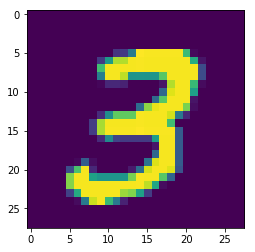

In [16]:
plt.figure()
plt.imshow(x_train[7])
plt.show()

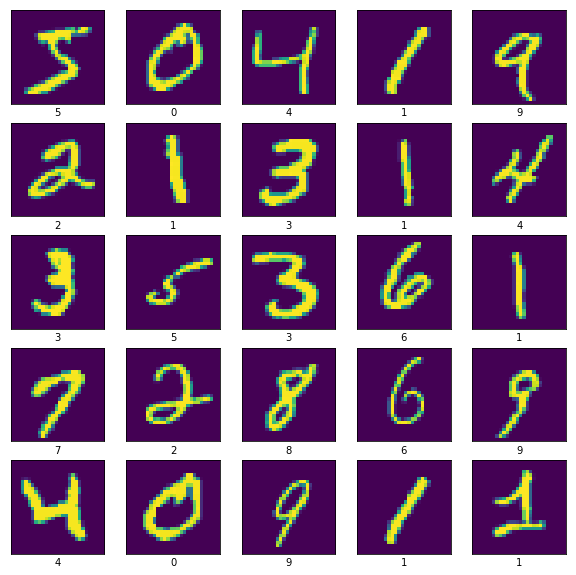

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
y_train.shape

(60000,)

In [20]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 784).astype('float32')/255.0
x_test = x_test.reshape(10000, 784).astype('float32')/255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
x_valid = x_train[50000:]
y_valid = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [25]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
hist= model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid)) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.7422 - acc: 0.7994 - val_loss: 0.3463 - val_acc: 0.9001
Epoch 2/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.3309 - acc: 0.9044 - val_loss: 0.2747 - val_acc: 0.9209
Epoch 3/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2781 - acc: 0.9193 - val_loss: 0.2419 - val_acc: 0.9313
Epoch 4/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2463 - acc: 0.9289 - val_loss: 0.2220 - val_acc: 0.9362
Epoch 5/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2216 - acc: 0.9361 - val_loss: 0.1964 - val_acc: 0.9456
Epoch 6/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2020 - acc: 0.9426 - val_loss: 0.1832 - val_acc: 0.9479
Epoch 7/100
50000/50000 [==

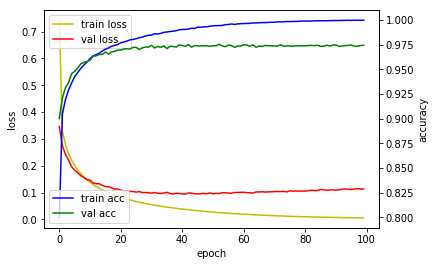

In [28]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')


plt.show()

In [29]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.7421921810436248, 0.33094873722791673, 0.2780997860336304, 0.24625891852378845, 0.22158570057034493, 0.2020090724015236, 0.18456514378070832, 0.1709923855036497, 0.1587922403180599, 0.14829993715584278, 0.1384620519515872, 0.12999890461027622, 0.12291740091443062, 0.1161205945366621, 0.10992048389106988, 0.10478283205226063, 0.0994589477673173, 0.09480938393503427, 0.09018560178309679, 0.0867728196823597, 0.08244549372270703, 0.07877362602680922, 0.07561569274663925, 0.07306451341629028, 0.06969479301214218, 0.06690474571540951, 0.0638608073605597, 0.06207231806702912, 0.059496690216958525, 0.05724946762248874, 0.05529788966476917, 0.05299813308857381, 0.05144238421991468, 0.04947476347975433, 0.04763115621529519, 0.04591654441177845, 0.044541391160190104, 0.04284884754486382, 0.04137958003088832, 0.03973234066657722, 0.03855614540785551, 0.03734940796393901, 0.03606416652984917, 0.03491632484339178, 0.033810268151573834, 0.032497532532736656, 0.031290630

In [31]:
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print(loss_and_acc)

10000/10000 [==============================] - 0s 26us/step
[0.09184780377618154, 0.9756]


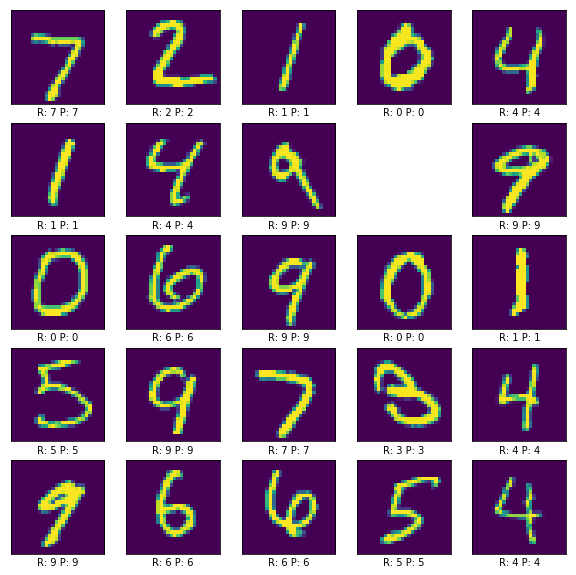

In [34]:
xhat = x_test
yhat = model.predict(xhat)

%matplotlib inline
import matplotlib.pyplot as plt



#plt_row = 10
#plt_col = 10


i = 0


plt.figure(figsize=(10,10))
for i in range(25):    
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) 
        plt.imshow(x_test[i].reshape(28, 28))
        plt.xlabel('R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat[i])))
        i += 1
      

plt.show()